In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

In [9]:
ng = pd.read_csv('n_grams.csv')

In [26]:
bg_titles = ng.loc[ng['1-gram'] == '2-gram']

In [27]:
bg_data = ng.loc[ng['1-gram'].str.len() == 2]

In [32]:
pd.concat([bg_titles, bg_data]).to_csv('bigrams.csv', index=False, header=False)

In [113]:
bg = pd.read_csv('bigrams.csv', index_col=0)

In [117]:
bg = bg.iloc[:,:62]

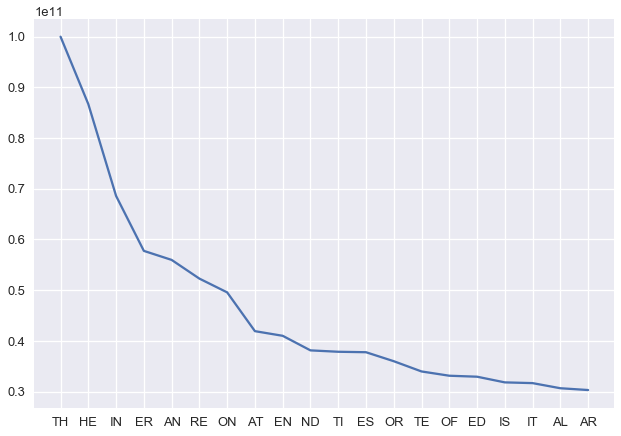

In [170]:
num = 20
plt.plot(bg['*/*'].iloc[:num])

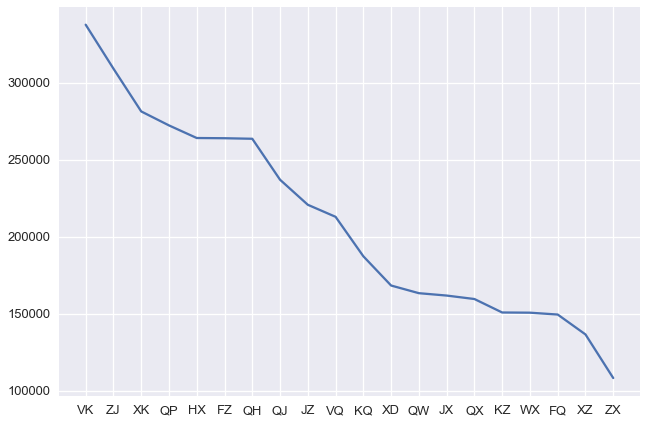

In [171]:
plt.plot(bg['*/*'].iloc[-num:])

In [172]:
type(bg['*/*'].iloc[:num])

pandas.core.series.Series

In [249]:
first_bg = bg['*/1:2'].sort_values(ascending=False).iloc[:30]

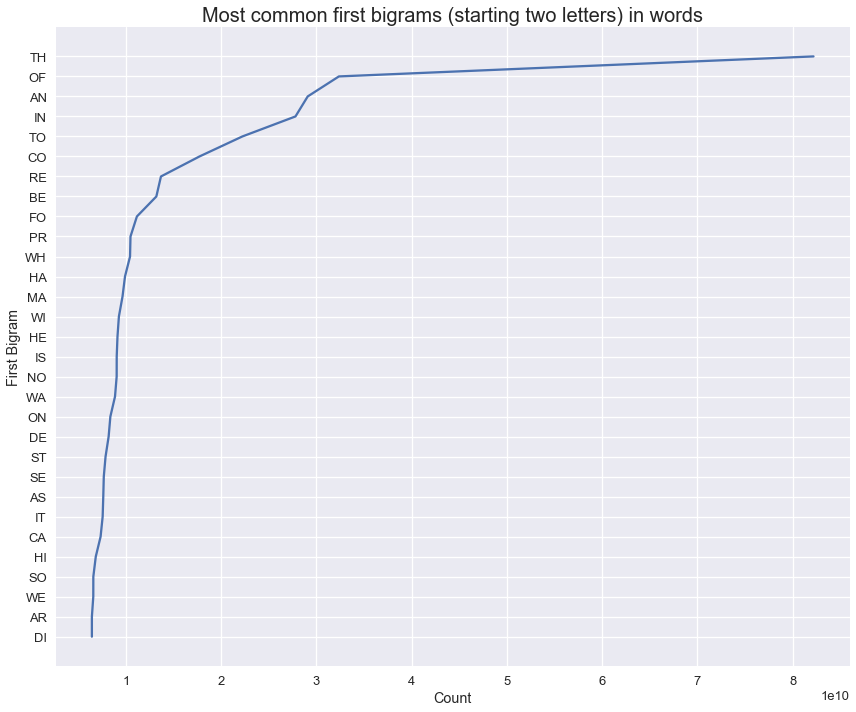

In [250]:
plt.figure(figsize=(12,10))
plt.plot(list(reversed(first_bg)), list(reversed(first_bg.index)))
plt.title('Most common first bigrams (starting two letters) in words', fontsize=20)
plt.ylabel('First Bigram')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [277]:
first_bg5 = bg['5/1:2'].sort_values(ascending=False).iloc[:100]

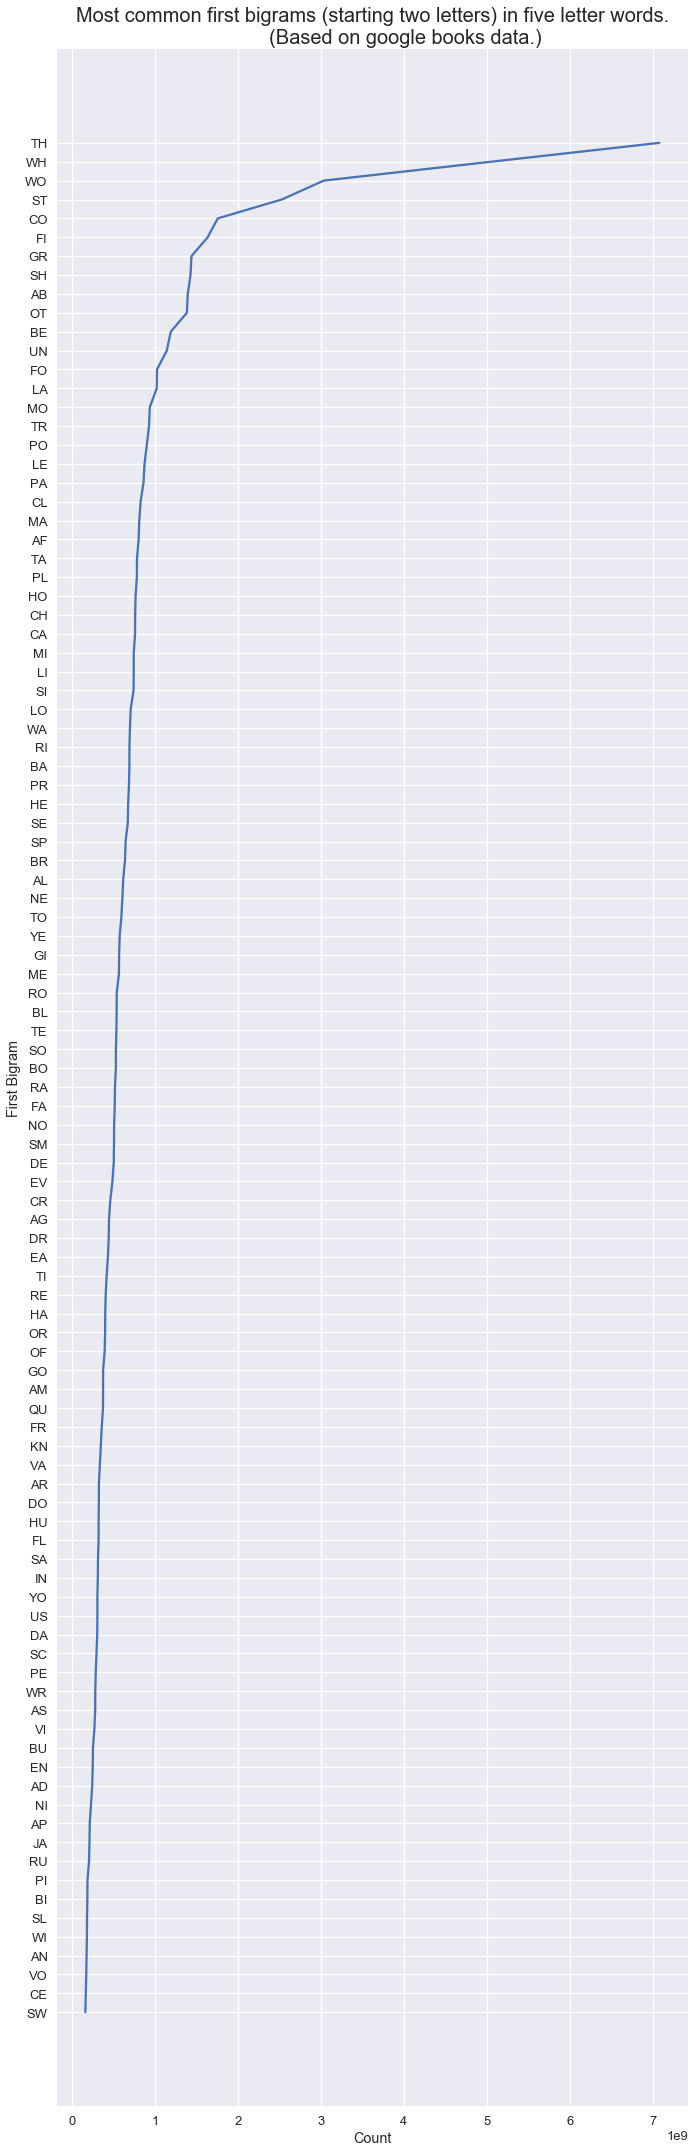

In [374]:
plt.figure(figsize=(10, len(first_bg5) * 0.3))
plt.plot(list(reversed(first_bg5)), list(reversed(first_bg5.index)))
plt.title('Most common first bigrams (starting two letters) in five letter words.\n\
            (Based on google books data.)', fontsize=20)
plt.ylabel('First Bigram')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [273]:
first_bg6 = bg['6/1:2'].sort_values(ascending=False).iloc[:100]

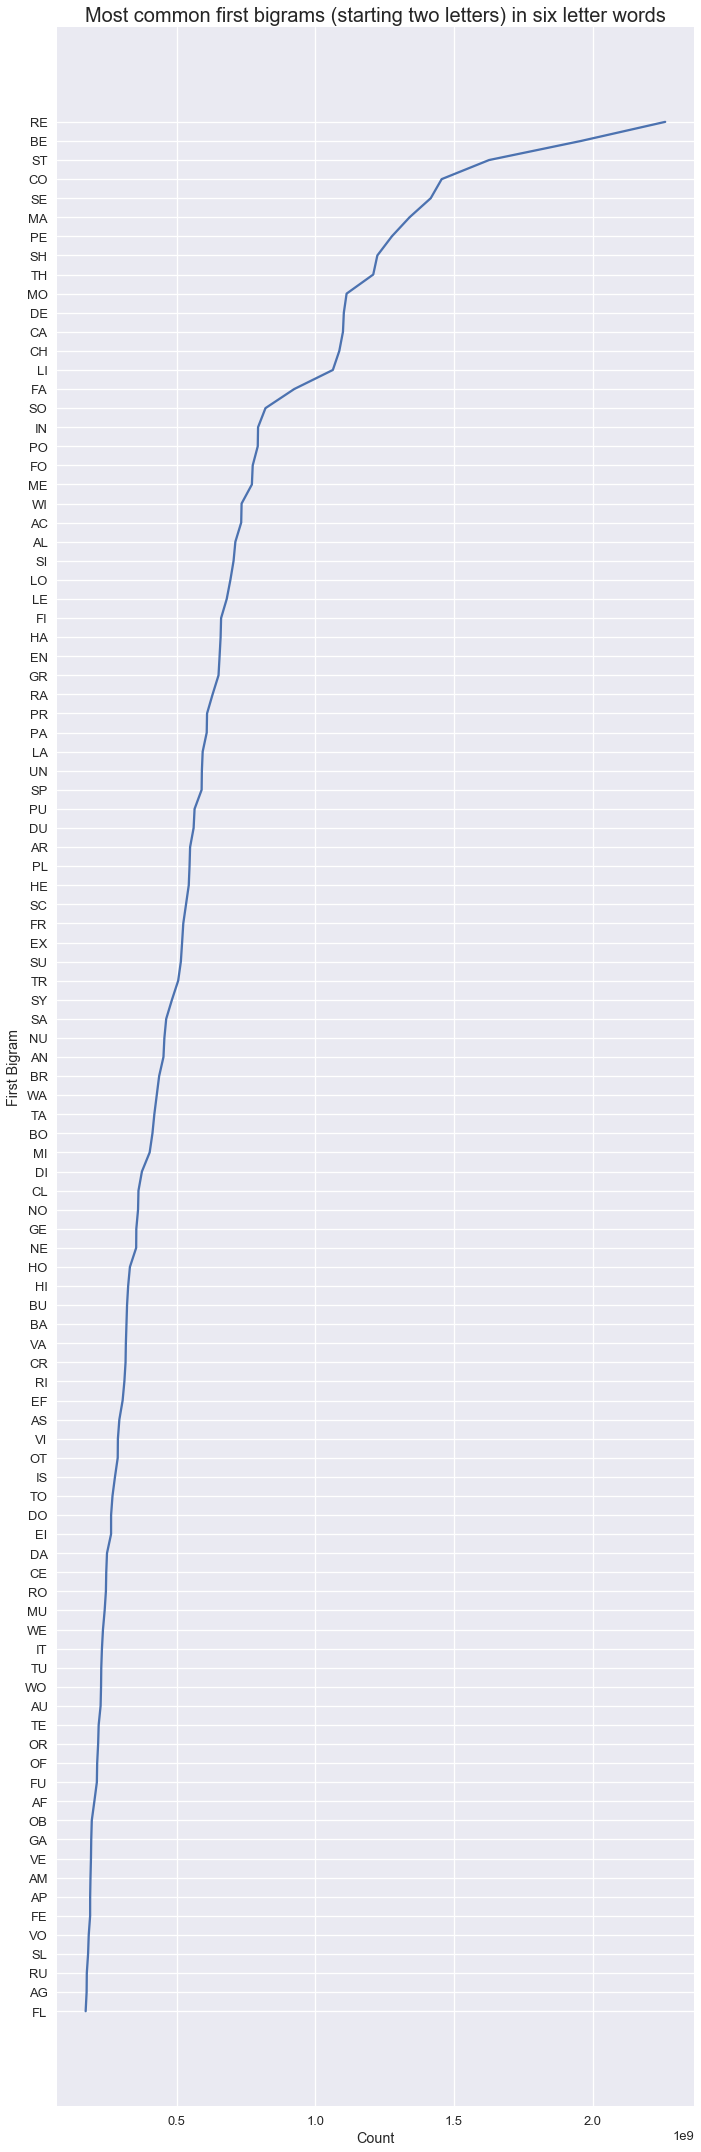

In [274]:
plt.figure(figsize=(10, len(first_bg6) * 0.3))
plt.plot(list(reversed(first_bg6)), list(reversed(first_bg6.index)))
plt.title('Most common first bigrams (starting two letters) in six letter words', fontsize=20)
plt.ylabel('First Bigram')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [245]:
last_bg = bg['*/-2:-1'].sort_values(ascending=False).iloc[:30]

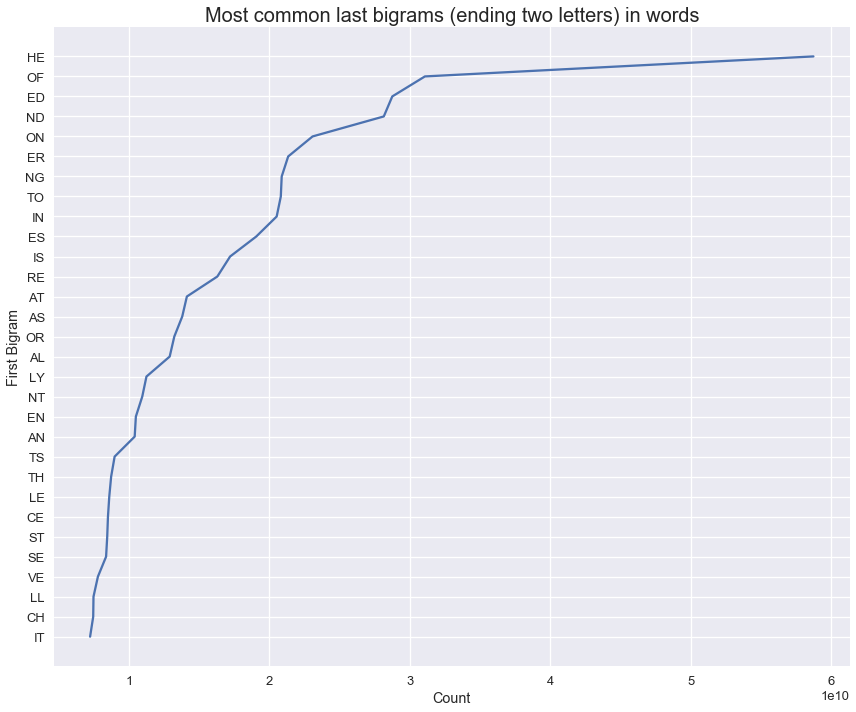

In [373]:
plt.figure(figsize=(12,10))
plt.plot(list(reversed(last_bg)), list(reversed(last_bg.index)))
plt.title('Most common last bigrams (ending two letters) in words', fontsize=20)
plt.ylabel('First Bigram')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [286]:
'abc'.upper()

'ABC'

In [290]:
with open('dict5.txt', 'r') as f:
    words5 = [word.strip().upper() for word in f]
    
with open('dict6.txt', 'r') as f:
    words6 = [word.strip().upper() for word in f]

In [291]:
len(words5)

6739

In [292]:
len(words6)

10482

In [346]:
import itertools
import string
import numpy as np

In [314]:
poss_bg = [''.join(two_let) for two_let in \
               list(itertools.permutations(list(string.ascii_uppercase), 2))] + \
                [let + let for let in list(string.ascii_uppercase)]

In [341]:
first_bg_all = list()
for b in poss_bg:
    bg_count = 0
    for word in words5:
        if word[:2] == b:
            bg_count += 1
    first_bg_all.append(bg_count)

In [348]:
first_sorted_poss_bg = \
    [poss_bg[index] for index in np.array(first_bg_all).argsort()]

first_bg_all.sort()

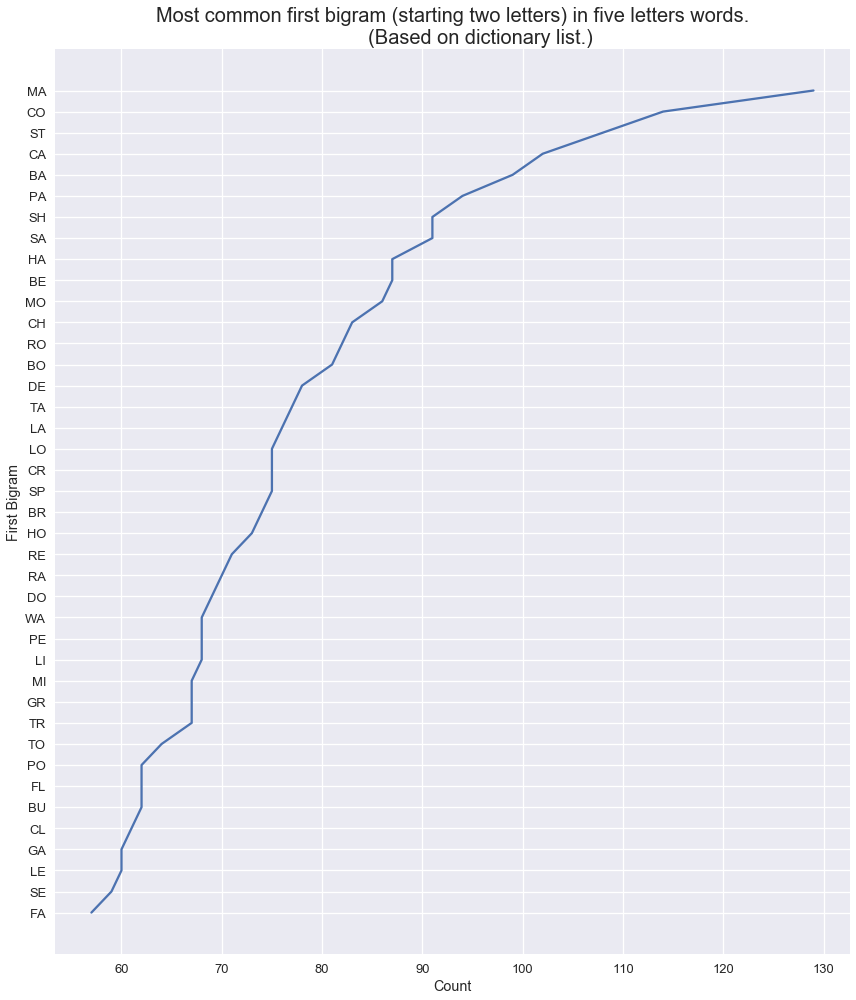

In [371]:
plt.figure(figsize=(12,14))
plt.plot(first_bg_all[-40:], first_sorted_poss_bg[-40:])
plt.title('Most common first bigram (starting two letters) in five letters words.\n\
          (Based on dictionary list.)', \
          fontsize=20)
plt.ylabel('First Bigram')
plt.xlabel('Count')
plt.tight_layout()
plt.show()